 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8889/notebooks/vqa/api.ipynb#Dataset-(Open-ended-questions)" data-toc-modified-id="Dataset-(Open-ended-questions)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dataset (Open-ended questions)</a></span></li><li><span><a href="http://localhost:8889/notebooks/vqa/api.ipynb#Evaluation" data-toc-modified-id="Evaluation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Evaluation</a></span></li></ul></div>

This jupyter notebook is adapted from the demos in the [VQA API](https://github.com/GT-Vision-Lab/VQA).

In [1]:
import matplotlib.pyplot as plt
import skimage.io as io
import random
import sys
import os

from collections import Counter

In [2]:
%load_ext autoreload

%autoreload 2

# Dataset (Open-ended questions)

In [3]:
from vqa_api.PythonHelperTools.vqaTools.vqa import VQA

Let's explore the dataset of **open ended questions** and their answers using the [VQA API](https://github.com/GT-Vision-Lab/VQA):

In [4]:
dataDir     = r'C:\Users\Nasser Benab\Documents\git\data\vqa'
versionType = '' # this should be '' when using VQA v1.0 dataset
taskType    = 'OpenEnded' # 'OpenEnded' only for v2.0. 'OpenEnded' 
                          # or 'MultipleChoice' for v1.0
dataType    = 'mscoco'  # 'mscoco' only for v1.0. 'mscoco' for real and 
                        # 'abstract_v002' for abstract for v1.0.
dataSubType = 'train2014'
annFile     = '%s/Annotations/%s%s_%s_annotations.json'%(dataDir, versionType, 
                                                         dataType, dataSubType)
quesFile    = '%s/Questions/%s%s_%s_%s_questions.json'%(dataDir, versionType, 
                                                        taskType, dataType, 
                                                        dataSubType)
imgDir      = '%s/Images/%s/%s/' %(dataDir, dataType, dataSubType)

In [5]:
# Different question types
path_question_types = os.path.join(dataDir, "QuestionTypes")
with open(os.path.join(path_question_types, "mscoco_question_types.txt")) as f:
    question_types = f.read().splitlines()
n_question_types = len(question_types)
print "There are {} different question types".format(n_question_types) 
question_types_examples = [random.choice(question_types) for i in range(3)]
print "Examples:" 
for i in range(len(question_types_examples)):
    print "{}. {}".format(i+1, question_types_examples[i]) 

There are 65 different question types
Examples:
1. can you
2. what
3. does the


In [6]:
# Initialize VQA api for QA annotations
vqa=VQA(annFile, quesFile)

loading VQA annotations and questions into memory...
0:00:11.348000
creating index...
index created!


In [7]:
# Dataset of answers
vqa.dataset.keys()

[u'info', u'data_subtype', u'license', u'data_type', u'annotations']

In [8]:
# Example of "one" annotation (10 answers)
vqa.dataset["annotations"][0]

{u'answer_type': u'other',
 u'answers': [{u'answer': u'oval',
   u'answer_confidence': u'yes',
   u'answer_id': 1},
  {u'answer': u'semi circle', u'answer_confidence': u'yes', u'answer_id': 2},
  {u'answer': u'curved', u'answer_confidence': u'yes', u'answer_id': 3},
  {u'answer': u'curved', u'answer_confidence': u'yes', u'answer_id': 4},
  {u'answer': u'double curve', u'answer_confidence': u'yes', u'answer_id': 5},
  {u'answer': u'banana', u'answer_confidence': u'maybe', u'answer_id': 6},
  {u'answer': u'curved', u'answer_confidence': u'yes', u'answer_id': 7},
  {u'answer': u'wavy', u'answer_confidence': u'yes', u'answer_id': 8},
  {u'answer': u'twisting', u'answer_confidence': u'no', u'answer_id': 9},
  {u'answer': u'curved', u'answer_confidence': u'maybe', u'answer_id': 10}],
 u'image_id': 487025,
 u'multiple_choice_answer': u'curved',
 u'question_id': 4870250,
 u'question_type': u'what'}

- *data_type*: 
             source of the images (mscoco or abstract_v002). 
- *data_subtype*: 
             type of data subtype (e.g. train2014/val2014/test2015 for mscoco, train2015/val2015 for abstract_v002). 
- *question_type*: 
             type of the question determined by the first few words of the question. For details, please see README. 
- *answer_type*: 
             type of the answer. Currently, "yes/no", "number", and "other". 
- *multiple_choice_answer*: 
             most frequent ground-truth answer. 
- *answer_confidence*: 
             subject's confidence in answering the question. For details, please see Antol et al., ICCV 2015. 

In [9]:
# Example of one question from the dataset of questions
vqa.questions["questions"][0]

{u'image_id': 487025,
 u'question': u'What shape is the bench seat?',
 u'question_id': 4870250}

In [10]:
# Number of questions
n_questions = len(vqa.questions["questions"])
print "There are {} questions in {}_{} dataset of {} questions, with 10 answers each.".\
format(n_questions, dataType, dataSubType, taskType)

There are 248349 questions in mscoco_train2014 dataset of OpenEnded questions, with 10 answers each.


In [11]:
# Number of unique questions
questions = [dic["question"] for dic in vqa.questions["questions"]]
n_unique_questions = len(list(set(questions)))
print "There are {} unique questions in {}_{} dataset of {} questions.".format(
    n_unique_questions, dataType, dataSubType, taskType)

# Count the occurence of each question
questions_counter = Counter(questions)
# Top 10 questions and their occurences
questions_top = questions_counter.most_common(5)
print("\nTop {} questions and their occurences:\n".format(len(questions_top)))
for i in range(len(questions_top)):
    print("{}. {}: {}".format(i+1, questions_top[i][0], questions_top[i][1]))

There are 152050 unique questions in mscoco_train2014 dataset of OpenEnded questions.

Top 5 questions and their occurences:

1. What room is this?: 821
2. What is the man doing?: 546
3. What sport is this?: 536
4. What time is it?: 467
5. What is the man holding?: 412


In [12]:
# Question id to answer dictionary (Ex: question_id = 4718600)
vqa.qa[4718600]

{u'answer_type': u'number',
 u'answers': [{u'answer': u'4',
   u'answer_confidence': u'maybe',
   u'answer_id': 1},
  {u'answer': u'4', u'answer_confidence': u'yes', u'answer_id': 2},
  {u'answer': u'4', u'answer_confidence': u'yes', u'answer_id': 3},
  {u'answer': u'4', u'answer_confidence': u'yes', u'answer_id': 4},
  {u'answer': u'4', u'answer_confidence': u'yes', u'answer_id': 5},
  {u'answer': u'4', u'answer_confidence': u'yes', u'answer_id': 6},
  {u'answer': u'4', u'answer_confidence': u'yes', u'answer_id': 7},
  {u'answer': u'4', u'answer_confidence': u'yes', u'answer_id': 8},
  {u'answer': u'4', u'answer_confidence': u'yes', u'answer_id': 9},
  {u'answer': u'4', u'answer_confidence': u'yes', u'answer_id': 10}],
 u'image_id': 471860,
 u'multiple_choice_answer': u'4',
 u'question_id': 4718600,
 u'question_type': u'how many'}

In [13]:
# Question id to question dictionary (Ex: question_id = 4718600)
vqa.qqa[4718600]

{u'image_id': 471860,
 u'question': u'How many trains are in the picture?',
 u'question_id': 4718600}

In [14]:
# Image id to answers (Ex: image_id = 471860)
vqa.imgToQA[471860]

[{u'answer_type': u'number',
  u'answers': [{u'answer': u'4',
    u'answer_confidence': u'maybe',
    u'answer_id': 1},
   {u'answer': u'4', u'answer_confidence': u'yes', u'answer_id': 2},
   {u'answer': u'4', u'answer_confidence': u'yes', u'answer_id': 3},
   {u'answer': u'4', u'answer_confidence': u'yes', u'answer_id': 4},
   {u'answer': u'4', u'answer_confidence': u'yes', u'answer_id': 5},
   {u'answer': u'4', u'answer_confidence': u'yes', u'answer_id': 6},
   {u'answer': u'4', u'answer_confidence': u'yes', u'answer_id': 7},
   {u'answer': u'4', u'answer_confidence': u'yes', u'answer_id': 8},
   {u'answer': u'4', u'answer_confidence': u'yes', u'answer_id': 9},
   {u'answer': u'4', u'answer_confidence': u'yes', u'answer_id': 10}],
  u'image_id': 471860,
  u'multiple_choice_answer': u'4',
  u'question_id': 4718600,
  u'question_type': u'how many'},
 {u'answer_type': u'other',
  u'answers': [{u'answer': u'trees',
    u'answer_confidence': u'yes',
    u'answer_id': 1},
   {u'answer': u'

In [15]:
# Number of unique images
n_images = len(vqa.imgToQA.keys())
print "There are {} unique images in {}_{} dataset of {} questions".format(
    n_images, dataType, dataSubType, taskType)

There are 82783 unique images in mscoco_train2014 dataset of OpenEnded questions


In [16]:
# Questions ids related to image 471860
vqa.getQuesIds(imgIds=[471860])

[4718600, 4718601, 4718602]

> **1 image** has **3** free-form natural-language **questions** with **10** concise open-ended **answers** each

In [17]:
# Questions ids related to image 471860 referring to "how many" questions
vqa.getQuesIds(imgIds=[471860], quesTypes=["how many"])

[4718600]

In [18]:
# Questions ids related to image 471860 referring to "how many" questions
vqa.getQuesIds(imgIds=[471860], ansTypes=["number"])

[4718600]

In [20]:
# Image ids related to question id 4718600
vqa.getImgIds(quesIds=[4718600])

[471860]

In [21]:
# Load answers related to question ids 4718600 and 4718601
vqa.loadQA(ids=[4718600, 4718601])

[{u'answer_type': u'number',
  u'answers': [{u'answer': u'4',
    u'answer_confidence': u'maybe',
    u'answer_id': 1},
   {u'answer': u'4', u'answer_confidence': u'yes', u'answer_id': 2},
   {u'answer': u'4', u'answer_confidence': u'yes', u'answer_id': 3},
   {u'answer': u'4', u'answer_confidence': u'yes', u'answer_id': 4},
   {u'answer': u'4', u'answer_confidence': u'yes', u'answer_id': 5},
   {u'answer': u'4', u'answer_confidence': u'yes', u'answer_id': 6},
   {u'answer': u'4', u'answer_confidence': u'yes', u'answer_id': 7},
   {u'answer': u'4', u'answer_confidence': u'yes', u'answer_id': 8},
   {u'answer': u'4', u'answer_confidence': u'yes', u'answer_id': 9},
   {u'answer': u'4', u'answer_confidence': u'yes', u'answer_id': 10}],
  u'image_id': 471860,
  u'multiple_choice_answer': u'4',
  u'question_id': 4718600,
  u'question_type': u'how many'},
 {u'answer_type': u'other',
  u'answers': [{u'answer': u'trees',
    u'answer_confidence': u'yes',
    u'answer_id': 1},
   {u'answer': u'

In [22]:
# Display the 10 answers to each question from a list of annotations 
vqa.showQA([vqa.dataset["annotations"][0], vqa.dataset["annotations"][1]])

Question: What shape is the bench seat?
Answer 1: oval
Answer 2: semi circle
Answer 3: curved
Answer 4: curved
Answer 5: double curve
Answer 6: banana
Answer 7: curved
Answer 8: wavy
Answer 9: twisting
Answer 10: curved
Question: Is there a shadow?
Answer 1: yes
Answer 2: yes
Answer 3: yes
Answer 4: yes
Answer 5: yes
Answer 6: yes
Answer 7: yes
Answer 8: yes
Answer 9: yes
Answer 10: yes


Question: How many people can the motorcycle fit on it?
Answer 1: 2
Answer 2: 2
Answer 3: 1
Answer 4: 5
Answer 5: 2
Answer 6: 1
Answer 7: 2
Answer 8: 2
Answer 9: 1
Answer 10: 2


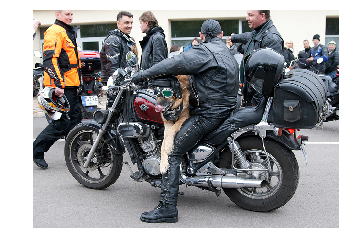

In [23]:
# load and display QA annotations for given question types
annIds = vqa.getQuesIds(quesTypes='how many');   
anns = vqa.loadQA(annIds)
randomAnn = random.choice(anns)
vqa.showQA([randomAnn])
imgId = randomAnn['image_id']
imgFilename = 'COCO_' + dataSubType + '_'+ str(imgId).zfill(12) + '.jpg'
if os.path.isfile(imgDir + imgFilename):
    I = io.imread(imgDir + imgFilename)
    plt.imshow(I)
    plt.axis('off')
    plt.show()

Question: Is this a forest?
Answer 1: no
Answer 2: zebra
Answer 3: no
Answer 4: no
Answer 5: no
Answer 6: yes
Answer 7: no
Answer 8: no
Answer 9: yes
Answer 10: yes


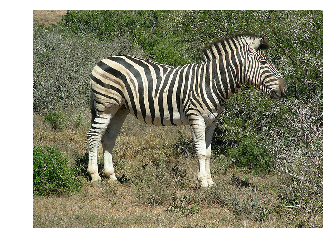

In [24]:
# load and display QA annotations for given answer types
"""
ansTypes can be one of the following
yes/no
number
other
"""
annIds = vqa.getQuesIds(ansTypes='yes/no');   
anns = vqa.loadQA(annIds)
randomAnn = random.choice(anns)
vqa.showQA([randomAnn])
imgId = randomAnn['image_id']
imgFilename = 'COCO_' + dataSubType + '_'+ str(imgId).zfill(12) + '.jpg'
if os.path.isfile(imgDir + imgFilename):
    I = io.imread(imgDir + imgFilename)
    plt.imshow(I)
    plt.axis('off')
    plt.show()

Question: Is anyone riding the motorcycle?
Answer 1: no
Answer 2: no
Answer 3: no
Answer 4: no
Answer 5: no
Answer 6: no
Answer 7: no
Answer 8: no
Answer 9: no
Answer 10: no


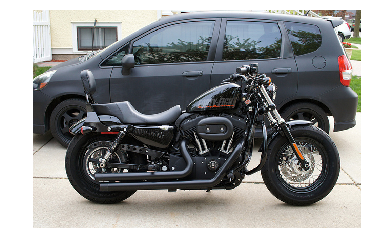

In [25]:
# load and display QA annotations for given images
"""
Usage: vqa.getImgIds(quesIds=[], quesTypes=[], ansTypes=[])
Above method can be used to retrieve imageIds for given question Ids or given 
question types or given answer types.
"""
ids = vqa.getImgIds()
annIds = vqa.getQuesIds(imgIds=random.sample(ids,5));  
anns = vqa.loadQA(annIds)
randomAnn = random.choice(anns)
vqa.showQA([randomAnn])  
imgId = randomAnn['image_id']
imgFilename = 'COCO_' + dataSubType + '_'+ str(imgId).zfill(12) + '.jpg'
if os.path.isfile(imgDir + imgFilename):
    I = io.imread(imgDir + imgFilename)
    plt.imshow(I)
    plt.axis('off')
    plt.show()

# Evaluation 

In [26]:
from vqa_api.PythonEvaluationTools.vqaEvaluation.vqaEval import VQAEval
import json

In [27]:
# set up file names and paths
versionType = '' # this should be '' when using VQA v1.0 dataset
taskType    = 'OpenEnded' # 'OpenEnded' only for v2.0. 'OpenEnded' or 
                          #'MultipleChoice' for v1.0
dataType    = 'mscoco'  # 'mscoco' only for v1.0. 'mscoco' for real 
                        # and 'abstract_v002' for abstract for v1.0. 
dataSubType = 'train2014'
annFile     = '%s/Annotations/%s%s_%s_annotations.json'%(dataDir, versionType, 
                                                         dataType, dataSubType)
quesFile    = '%s/Questions/%s%s_%s_%s_questions.json'%(dataDir, versionType, 
                                                        taskType, dataType, 
                                                        dataSubType)
imgDir      = '%s/Images/%s/%s/' %(dataDir, dataType, dataSubType)
resultType  = 'fake'
fileTypes   = ['results', 'accuracy', 'evalQA', 'evalQuesType', 'evalAnsType']

In [28]:
# An example result json file has been provided in './Results' folder.  

[resFile, accuracyFile, evalQAFile, evalQuesTypeFile, evalAnsTypeFile] = \
['%s/Results/%s%s_%s_%s_%s_%s.json'%(dataDir, versionType, taskType, dataType, dataSubType, \
resultType, fileType) for fileType in fileTypes] 
print "Fake results file:", resFile

Fake results file: C:\Users\Nasser Benab\Documents\git\data\vqa/Results/OpenEnded_mscoco_train2014_fake_results.json


In [29]:
# create vqa object and vqaRes object
vqa = VQA(annFile, quesFile)
vqaRes = vqa.loadRes(resFile, quesFile)

loading VQA annotations and questions into memory...
0:00:15.520000
creating index...
index created!
Loading and preparing results...     
DONE (t=2.00s)
creating index...
index created!


In [30]:
n_res_questions = len(vqaRes.questions["questions"])
n_rest_annotations = len(vqaRes.dataset["annotations"])
print "There are {} questions and {} corresponding answers in the results json file.".\
format(n_res_questions, n_rest_annotations)

There are 248349 questions and 248349 corresponding answers in the results json file.


The json results file has the following format: {"answer": "3", "question_id": 1365592}

In [31]:
# create vqaEval object by taking vqa and vqaRes
# n is precision of accuracy (number of places after decimal), default is 2
vqaEval = VQAEval(vqa, vqaRes, n=2)   

For computing the accuracy on some evaluation set, for the open-ended task the metric used is the following (as described in the paper):

$$accuracy = min(\frac{\sharp \ humans \ that \ provided \ that \ answer}{3}, 1) $$

Thus, whenever the predicted answer is present at least three times among the 10 answers, the accuracy is equal to 1. Otherwise, it is equal to $\frac{2}{3}$, $\frac{1}{3}$ or 0.

In *vqaEval.py* the accuracies are returned in %. 

computing accuracy
Finshed Percent: [####################] 99% Done computing accuracy


Overall Accuracy is: 6.59

Per Question Type Accuracy is the following:
are there : 6.56
what brand : 5.70
what room is : 5.14
what color is : 6.98
is : 6.86
are they : 7.87
what number is : 6.24
what sport is : 6.68
is this person : 6.86
is the : 7.43
can you : 5.93
how many : 7.80
does this : 6.99
is there a : 6.40
are : 7.27
is he : 7.15
what : 5.51
does the : 6.80
is the person : 7.63
where is the : 5.52
what animal is : 6.28
how : 5.93
what is the woman : 5.73
none of the above : 6.62
who is : 4.70
where are the : 4.81
are the : 8.03
how many people are : 7.36
what is on the : 5.10
has : 7.63
was : 7.77
what type of : 6.09
do : 7.48
what is the man : 6.30
which : 5.85
are these : 6.55
what are : 5.31
is this a : 6.75
is the woman : 6.35
what is the : 6.21
what time : 5.60
what are the : 5.96
are there any : 6.64
what color are the : 6.44
why : 5.01
what is this : 5.80
what is the person : 5.74

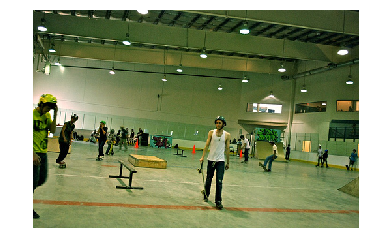

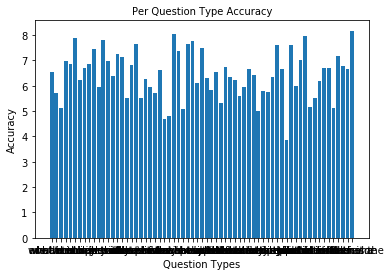

In [32]:
# evaluate results
"""
If you have a list of question ids on which you would like to evaluate your results, pass it as a list to below function
By default it uses all the question ids in annotation file
"""
vqaEval.evaluate() 

# print accuracies
print "\n" 
print "Overall Accuracy is: %.02f\n" %(vqaEval.accuracy['overall']) 
print "Per Question Type Accuracy is the following:" 
for quesType in vqaEval.accuracy['perQuestionType']:
    print "%s : %.02f" %(quesType, vqaEval.accuracy['perQuestionType'][quesType]) 
print "\n"
print "Per Answer Type Accuracy is the following:" 
for ansType in vqaEval.accuracy['perAnswerType']:
    print("%s : %.02f" %(ansType, vqaEval.accuracy['perAnswerType'][ansType]))
print("\n")
# demo how to use evalQA to retrieve low score result
# 35 is per question percentage accuracy
evals = [quesId for quesId in vqaEval.evalQA if vqaEval.evalQA[quesId]<35]   
if len(evals) > 0:
    print 'ground truth answers'
    randomEval = random.choice(evals)
    randomAnn = vqa.loadQA(randomEval)
    vqa.showQA(randomAnn)

    print '\n'
    print 'generated answer (accuracy %.02f)'%(vqaEval.evalQA[randomEval])
    ann = vqaRes.loadQA(randomEval)[0]
    print "Answer:   %s\n" %(ann['answer'])

    imgId = randomAnn[0]['image_id']
    imgFilename = 'COCO_' + dataSubType + '_'+ str(imgId).zfill(12) + '.jpg'
    if os.path.isfile(imgDir + imgFilename):
        I = io.imread(imgDir + imgFilename)
        plt.imshow(I)
        plt.axis('off')
        plt.show()

# plot accuracy for various question types
plt.bar(list(range(len(vqaEval.accuracy['perQuestionType']))), 
        list(vqaEval.accuracy['perQuestionType'].values()), align='center')
plt.xticks(list(range(len(vqaEval.accuracy['perQuestionType']))), 
           list(vqaEval.accuracy['perQuestionType'].keys()), 
           rotation='0',fontsize=10)
plt.title('Per Question Type Accuracy', fontsize=10)
plt.xlabel('Question Types', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.show()

# save evaluation results to ./Results folder
json.dump(vqaEval.accuracy,     open(accuracyFile,     'w'))
json.dump(vqaEval.evalQA,       open(evalQAFile,       'w'))
json.dump(vqaEval.evalQuesType, open(evalQuesTypeFile, 'w'))
json.dump(vqaEval.evalAnsType,  open(evalAnsTypeFile,  'w'))